# Hands On 3.1 - Machine learning and classification

In this laboratory you will learn about classification problems and how they can be approached using a
category of tree-based models. In particular, you will use a decision tree from scikit-learn. You will see
it in action with different datasets and understand its points of strength and weaknesses. Then, you will
implement your own version of a random forest (already given), starting from scikit-learn’s decision trees.

## 1. Wine classification

In [87]:
from sklearn.datasets import load_wine
import numpy as np

dataset = load_wine()

print(dataset.keys())
X = dataset["data"]
y = dataset["target"]
feature_names = dataset["feature_names"]

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [88]:
print(dataset['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In this exercise, you will use sklearn’s `DecisionTreeClassifier` to build a decision tree for the wine dataset. You can read more about this class on the [official documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).


1. Based on your $X$ and $y$, answer the following questions:

- How many records are available?
- Are there missing values?
- How many elements does each class contain?

In [6]:
## Write your code here ##
num_records = X.shape[0]
num_missing = np.isnan(X.flatten()).sum()

print(f"Number available records: {num_records}")
print(f"Number missing values: {num_missing}")

print(f"Elements does each class") # print a list or whatever you want
for c in np.unique(y):
    print(f"Class '{c}': {X[y==c].shape[0]}")

Number available records: 178
Number missing values: 0
Elements does each class
Class '0': 59
Class '1': 71
Class '2': 48


2. Create a `DecisionTreeClassifier` object with the default configuration (i.e. without passing any
parameters to the constructor). Train the classifier using your $X$ and $y$.

In [8]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

3. Now that you have created a tree, you can visualize it. Sklearn offers two functions to visualize decision trees. The first one, `plot_tree()`, plots the tree in a matplotlib-based, interactive window.
An alternative way is using `export_graphviz()`, which exports the tree as a DOT file. DOT
is a language for describing graph (and, as a consequence, trees). From the DOT code, you can
generate the resulting visual representation either using specific Python libraries. We recommend using the first approach, which is faster.

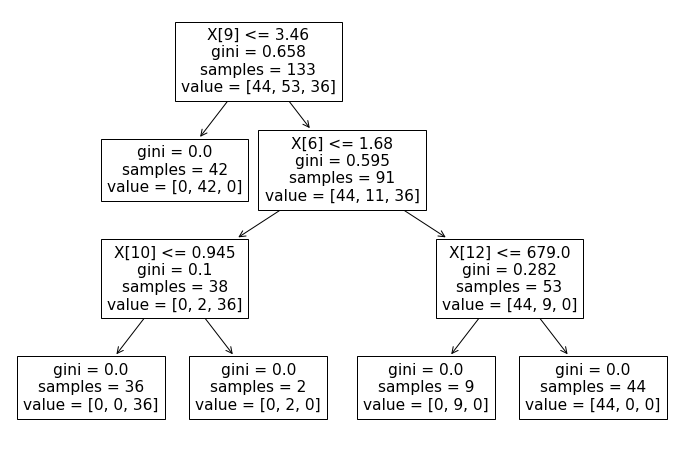

In [89]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

# Idea: can you increase the plot size? ax can be something you already used
p = plot_tree(clf, ax=None)

After you successfully plotted a tree, you can take a closer look at the result and draw some conclusions. In particular, what information is contained in each node? Take a closer look at the leaf
nodes. Based on what you know about overfitting, what can you learn from these nodes?

4. Given the dataset $X$, you can get the predictions of the classifier (one for each entry in X) by calling the `predict()` of `DecisionTreeClassifier`. Then, use the `accuracy_score()` function (which you can import from `sklearn.metrics`) to compute the accuracy between two lists of values (`y_true`,
the list of “correct” labels, and `y_pred`, the list of predictions made by the classifier). Since you
already have both these lists ($y$ for the ground truth, and the result of the `predict()` method for the prediction), you can already compute the accuracy of your classifier. What result do you get? Does
this result seem particularly **high/low**? Why do you think that is?

In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(y, clf.predict(X))

1.0

### ⚠️ Try to answer this question before going on

5. Now, we can split our dataset into a training set and a test set. We will use the training set to train a model, and to assess its performance with the test set. Sklearn offers the `train_test_split()`
function to split any number of arrays (all having the same length on the first dimension) into two
sets. You can refer to the [official documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to understand how it can be used. You can use an
80/20 train/test split. If used correctly, you will get 4 arrays: `X_train`, `X_test`, `y_train`, `y_test`.

    Try to compute the balance between the classes for train and test sets, is it fine?
> **Hint:** Consider attributes such as `shuffle` and `stratify` to answer this question.


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, stratify=y)
y_train, y_test

(array([1, 2, 2, 1, 2, 1, 0, 0, 2, 0, 2, 1, 0, 0, 1, 2, 2, 1, 1, 2, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1,
        1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 2, 0, 2, 2, 1, 1,
        1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 1, 2, 0, 1, 1, 1,
        0, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1,
        2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 0,
        0, 2, 1, 2, 2, 2, 1, 1, 0, 1]),
 array([1, 0, 0, 2, 0, 1, 2, 0, 2, 1, 2, 0, 0, 2, 1, 0, 1, 2, 2, 0, 1, 2,
        1, 0, 1, 1, 2, 1, 0, 0, 1, 1, 1, 2, 1, 0]))

In [29]:
print("train")
for c in [0,1,2]:
    print(c, len(y_train[y_train==c])/len(y_train))
 
print("\ntest")
for c in [0,1,2]:
    print(c, len(y_test[y_test==c])/len(y_test))

train
0 0.33098591549295775
1 0.4014084507042254
2 0.2676056338028169

test
0 0.3333333333333333
1 0.3888888888888889
2 0.2777777777777778


6. Now, train a new model using (`X_train`, `y_train`) and compute the accuracy with (`X_test`,
`y_test`). How does this value compare to the previously computed one? Is this a more reasonable
value? Why? 

    This should give you a good idea as to why training and testing on the same dataset returns meaningless results. Try also to use the `classification_report` function, which returns various metrics (including the accuracy) for each of the classes of the problem.


              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.92      0.79      0.85        14
           2       0.77      1.00      0.87        10

    accuracy                           0.89        36
   macro avg       0.90      0.90      0.89        36
weighted avg       0.90      0.89      0.89        36



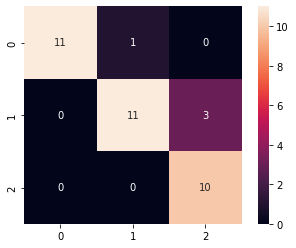

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
g = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, square=True)
